Aplicación Práctica

Para consolidar tus conocimientos, realiza la siguiente actividad práctica:


* Cargar y Limpiar el Dataset: Utiliza un dataset de Kaggle relacionado con ventas, salud o cualquier otro tema de interés.
* Calcular las Correlaciones: Calcula las correlaciones de Pearson, Spearman y Kendall entre las variables del dataset.
* Crear Mapas de Calor: Crea mapas de calor para cada tipo de correlación y analiza las relaciones entre las variables.
* Interpretar los Resultados: Escribe un breve informe sobre las correlaciones encontradas y cómo pueden influir en el análisis de datos y la toma de decisiones.


In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
def cargar_datos(ruta_archivo):
    # Carga los datos del archivo CSV
    datos = pd.read_csv(ruta_archivo, delimiter=',')
    return datos
##Se realiza la carga con Pandas ya que numpy no muestra los valores categoricos
if __name__ == "__main__":
    ruta_archivo = '../data_science_fundamentals/data/World-happiness-report-2024.csv'
    
    df = cargar_datos(ruta_archivo)

    print(df.head())

  Country name            Regional indicator  Ladder score  upperwhisker  \
0      Finland                Western Europe         7.741         7.815   
1      Denmark                Western Europe         7.583         7.665   
2      Iceland                Western Europe         7.525         7.618   
3       Sweden                Western Europe         7.344         7.422   
4       Israel  Middle East and North Africa         7.341         7.405   

   lowerwhisker  Log GDP per capita  Social support  Healthy life expectancy  \
0         7.667               1.844           1.572                    0.695   
1         7.500               1.908           1.520                    0.699   
2         7.433               1.881           1.617                    0.718   
3         7.267               1.878           1.501                    0.724   
4         7.277               1.803           1.513                    0.740   

   Freedom to make life choices  Generosity  Perceptions of co

In [44]:
##Imprime informacion del dataframe
print("nInformación del DataFrame:")
print(df.info())
## Imprime estadistica descriptiva del DF
print("nEstadísticas descriptivas del DataFrame:")
print(df.describe())

nInformación del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   Regional indicator            143 non-null    object 
 2   Ladder score                  143 non-null    float64
 3   upperwhisker                  143 non-null    float64
 4   lowerwhisker                  143 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usa

In [45]:
##Verificar el tipo de datos
print(df.dtypes)
##Modificar el tipo de dato object a String
df['Country name'] = df['Country name'].astype('string')
df['Regional indicator'] = df['Regional indicator'].astype('string')
print(df.dtypes)

Country name                     object
Regional indicator               object
Ladder score                    float64
upperwhisker                    float64
lowerwhisker                    float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object
Country name                    string[python]
Regional indicator              string[python]
Ladder score                           float64
upperwhisker                           float64
lowerwhisker                           float64
Log GDP per capita                     float64
Social support                         float64
Healthy life expectancy                float64
Freedom to make life choices           float64
Generosity                             float64
Perceptions of corruption           

In [46]:
##Limpieza de datos
##Verificar datos duplicados
#Deteccion de valores duplicados
print("elementos duplicados: ", df.duplicated().sum())
## No se encuentran datos nulos

def visualizacion_valores_nulos(df):
    ##Detallado de valores nulos por columna
    # Esto permite determinar cuántos valores en cada columna tienen datos cargados
    qsna = df.shape[0] - df.isnull().sum(axis=0)
    # Calcula la cantidad de valores nulos en cada columna del DataFrame
    qna = df.isnull().sum(axis=0)
    # Calcula el porcentaje de valores nulos en cada columna y redondea a 2 decimales
    ppna = round(100 * (df.isnull().sum(axis=0) / df.shape[0]), 2)
    # Crea un diccionario auxiliar con la cantidad de datos sin nulos, cantidad de nulos y porcentaje de nulos
    aux = {'datos sin NAs en q': qsna, 'Na en q': qna, 'Na en %': ppna}
    # Convierte el diccionario en un DataFrame
    na = pd.DataFrame(data=aux)
    # Ordena el DataFrame por el porcentaje de valores nulos en orden descendente
    na.sort_values(by='Na en %', ascending=False)

    print(na)

visualizacion_valores_nulos(df)
# Filas que contienen al menos un valor null en alguna columna
filas_con_null = df[df.isnull().any(axis=1)]

# Mostrar las filas con valores nulos
print(filas_con_null)


elementos duplicados:  0
                              datos sin NAs en q  Na en q  Na en %
Country name                                 143        0      0.0
Regional indicator                           143        0      0.0
Ladder score                                 143        0      0.0
upperwhisker                                 143        0      0.0
lowerwhisker                                 143        0      0.0
Log GDP per capita                           140        3      2.1
Social support                               140        3      2.1
Healthy life expectancy                      140        3      2.1
Freedom to make life choices                 140        3      2.1
Generosity                                   140        3      2.1
Perceptions of corruption                    140        3      2.1
Dystopia + residual                          140        3      2.1
           Country name                  Regional indicator  Ladder score  \
61              Bahrain    

In [53]:
##Se crea metodo para asignar valores por tipo de datos en todos los casos.
def manejar_nulos(datos):
    for column in datos.columns:
        if datos[column].dtype == 'string[python]':
            datos[column] = datos[column].fillna('Desconocido')
        elif datos[column].dtype in ['int64', 'float64']:
            # Asignar de vuelta la interpolación
            datos[column] = datos[column].fillna(datos[column].interpolate())

manejar_nulos(df)

visualizacion_valores_nulos(df)


                              datos sin NAs en q  Na en q  Na en %
Country name                                 143        0      0.0
Regional indicator                           143        0      0.0
Ladder score                                 143        0      0.0
upperwhisker                                 143        0      0.0
lowerwhisker                                 143        0      0.0
Log GDP per capita                           143        0      0.0
Social support                               143        0      0.0
Healthy life expectancy                      143        0      0.0
Freedom to make life choices                 143        0      0.0
Generosity                                   143        0      0.0
Perceptions of corruption                    143        0      0.0
Dystopia + residual                          143        0      0.0


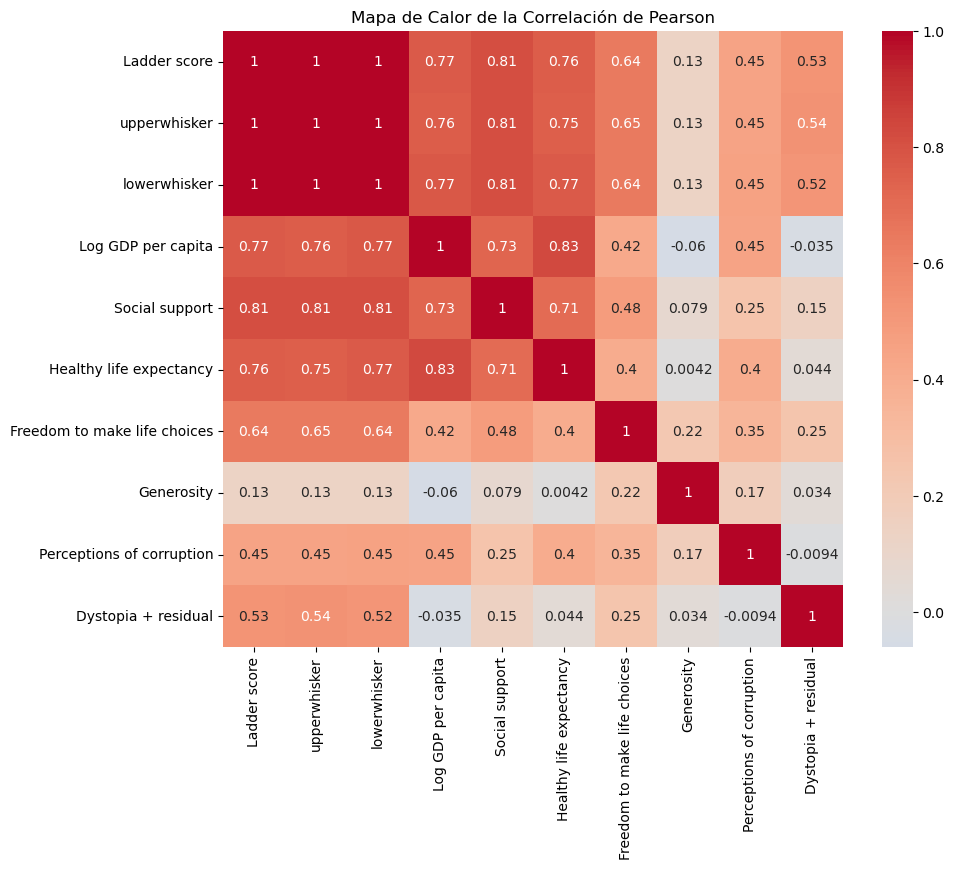

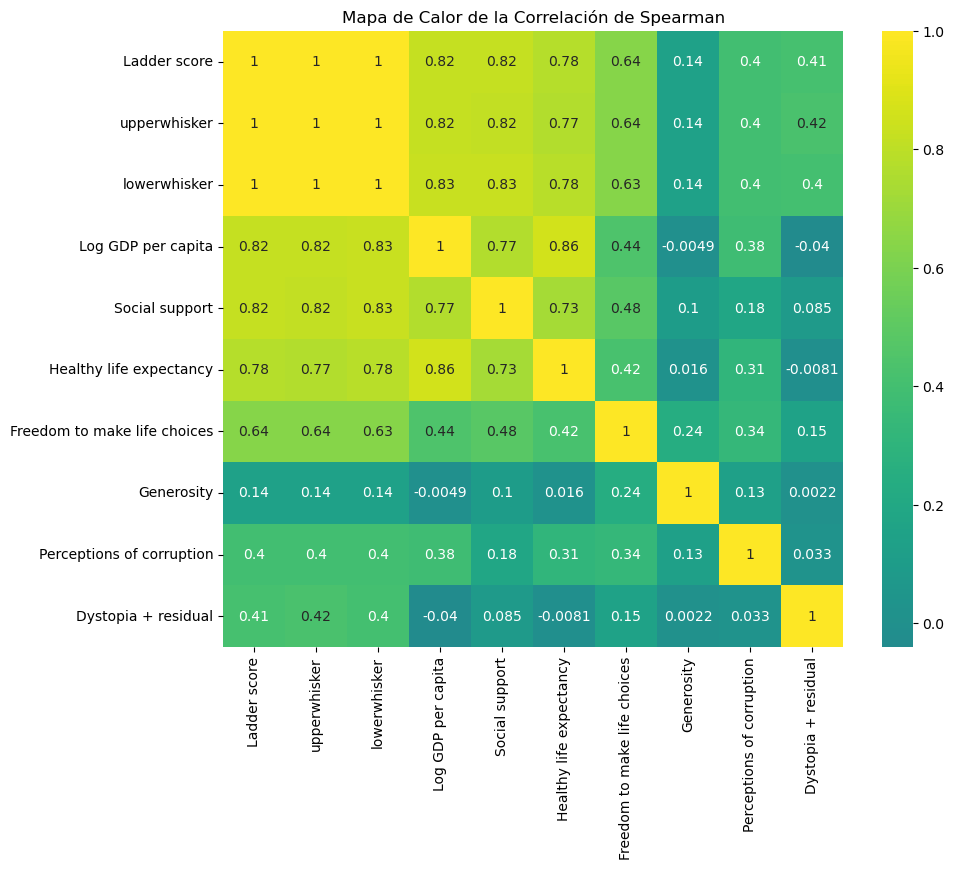

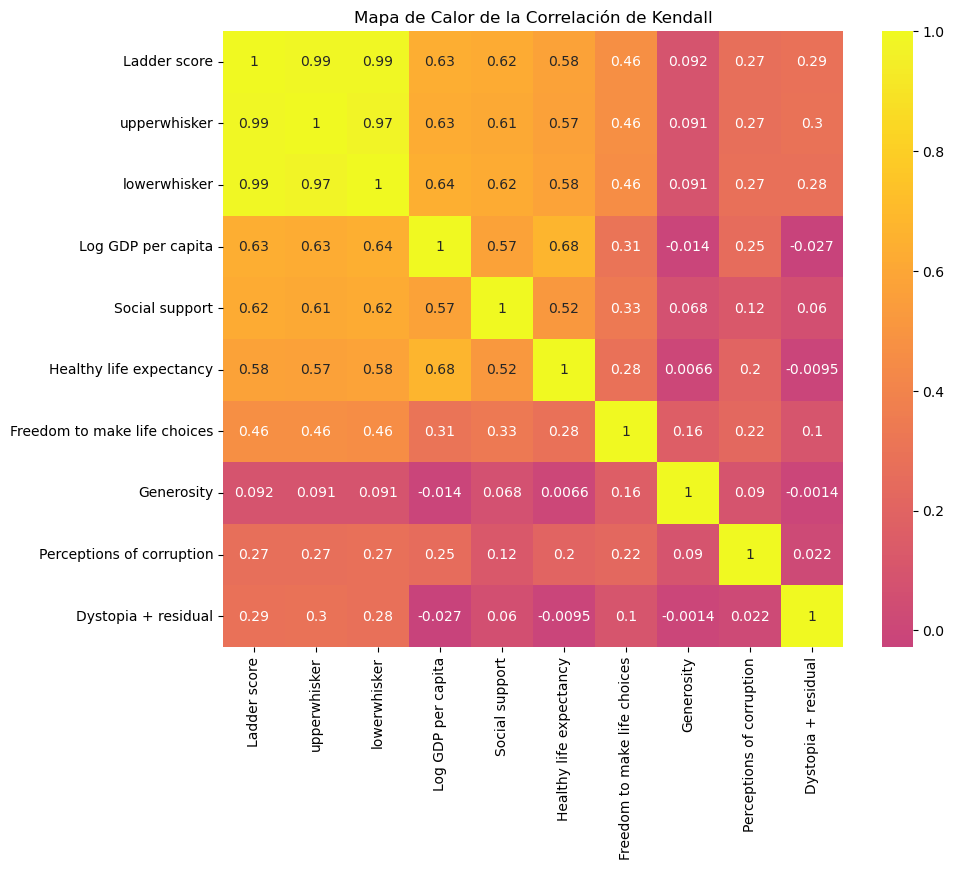

In [55]:
# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calcular las correlaciones
correlation_matrix = numeric_df.corr(method='pearson')
spearman_corr = numeric_df.corr(method='spearman')
kendall_corr = numeric_df.corr(method='kendall')

# Crear mapas de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de la Correlación de Pearson")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='viridis', center=0)
plt.title("Mapa de Calor de la Correlación de Spearman")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(kendall_corr, annot=True, cmap='plasma', center=0)
plt.title("Mapa de Calor de la Correlación de Kendall")
plt.show()